## 긍정 및 부정 평가에 따른 문장 분류 및 저장

In [2]:
import pandas as pd

list_comp = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META', 'NVDA', 'TSLA']
file_youtube = ['./result/youtube_com_1m_{}.csv'.format(comp) for comp in list_comp]
file_reddit = ['./result/reddit_post_{}_result.csv'.format(comp) for comp in list_comp] 
file_reddit_v2 = ['./result/reddit_key_{}_result.csv'.format(comp) for comp in list_comp]

In [32]:
from datetime import datetime, timedelta

i = 5
chunk_size = 100000
read_file_1 = pd.read_csv(file_youtube[i])
chunks_ = pd.read_csv(file_reddit[i], index_col=0, chunksize=chunk_size, engine='python')
read_file_2 = pd.concat(chunks_)
chunks = pd.read_csv(file_reddit_v2[i], index_col=0, chunksize=chunk_size, engine='python')
read_file_3 = pd.concat(chunks)

final_result = pd.concat([read_file_1, read_file_2, read_file_3], axis=0, ignore_index=True, sort=False)


final_result['date'] = pd.to_datetime(final_result['date'], errors='coerce')
yesterday = datetime.now() - timedelta(2)
final_result['date'].fillna(yesterday, inplace=True)

df_negative = final_result[final_result['sent'] == 'NEGATIVE']
df_positive = final_result[final_result['sent'] == 'POSITIVE']

df_negative.to_csv('./result/sent_classification/{}_negative.csv'.format(list_comp[i]), index=False)
df_positive.to_csv('./result/sent_classification/{}_positive.csv'.format(list_comp[i]), index=False)    
final_result.to_csv('./result/sent_classification/{}_all_text.csv'.format(list_comp[i]), index=False) 

/var/folders/3q/6w3pyc5n0cv5qldwzxh36gk00000gn/T/ipykernel_83409/515806403.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_result['date'].fillna(yesterday, inplace=True)


In [1]:
import pandas as pd
from datetime import datetime, timedelta

# Load the data
appl_result = pd.read_csv('./result/sent_classification/MSFT_all_text.csv')

# Convert the 'date' column to datetime format, ignoring errors
appl_result['date'] = pd.to_datetime(appl_result['date'], errors='coerce')

# Fill NaT dates with yesterday's date
yesterday = datetime.now() - timedelta(1)
appl_result['date'].fillna(yesterday, inplace=True)

# Create a new column 'month' to store the month and year
appl_result['month'] = appl_result['date'].dt.to_period('M')

# Group by the 'month' column
monthly_groups = appl_result.groupby('month')

# Count the number of entries per month
monthly_counts = monthly_groups.size()

# Display the results
print(monthly_counts)

month
2021-09     1457
2023-01     1157
2023-12      197
2024-01      722
2024-04      514
2024-05     1742
2024-06       39
2024-07    17572
Freq: M, dtype: int64


/var/folders/3q/6w3pyc5n0cv5qldwzxh36gk00000gn/T/ipykernel_54122/1405985423.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  appl_result['date'].fillna(yesterday, inplace=True)


In [80]:
specific_month = '2024-07'
specific_month_data = appl_result[appl_result['month'] == specific_month]
specific_month_comment = specific_month_data['comment']
specific_month_comment_ = specific_month_comment[specific_month_comment.index % 10 == 0]
specific_month_comment_.to_csv('./result/sent_classification/META_{}_neg_.csv'.format(specific_month), index=False)

In [3]:
import pandas as pd
from datetime import datetime, timedelta

def get_monthly_ratio(i):
    list_comp = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META', 'NVDA', 'TSLA']
    # Load the data
    appl_result = pd.read_csv('./result/sent_classification/{}_all_text.csv'.format(list_comp[i]))

    # Convert the 'date' column to datetime format, ignoring errors
    appl_result['date'] = pd.to_datetime(appl_result['date'], errors='coerce')

    # Fill NaT dates with yesterday's date
    yesterday = datetime.now() - timedelta(1)
    appl_result['date'].fillna(yesterday, inplace=True)

    # Create a new column 'month' to store the month and year
    appl_result['month'] = appl_result['date'].dt.to_period('M')

    # Group by the 'month' column
    monthly_groups = appl_result.groupby('month')

    # Count the number of entries per month
    monthly_counts = monthly_groups.size()

    # Display the results

    dict_month_ratio = {}
    for month, data in monthly_groups:
        neg_count = data[data['sent'] == 'NEGATIVE'].shape[0]
        pos_count = data[data['sent'] == 'POSITIVE'].shape[0]
        ratio = pos_count/ (neg_count + pos_count)

        if neg_count+pos_count <30:
            continue

        dict_month_ratio[month] = ratio

    return dict_month_ratio

list_for_ratio = {}
for i in range(7):
    dict_month_ratio = get_monthly_ratio(i)
    list_for_ratio[list_comp[i]] = dict_month_ratio


/var/folders/3q/6w3pyc5n0cv5qldwzxh36gk00000gn/T/ipykernel_59882/3886140668.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  appl_result['date'].fillna(yesterday, inplace=True)
/var/folders/3q/6w3pyc5n0cv5qldwzxh36gk00000gn/T/ipykernel_59882/3886140668.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [4]:
df = pd.DataFrame(list_for_ratio)
df_all = df.reset_index().rename(columns={'index': 'month'})
df_month = df_all.sort_values(by='month')
df_month.to_csv('./result/sent_classification/monthly_ratio.csv', index=True)

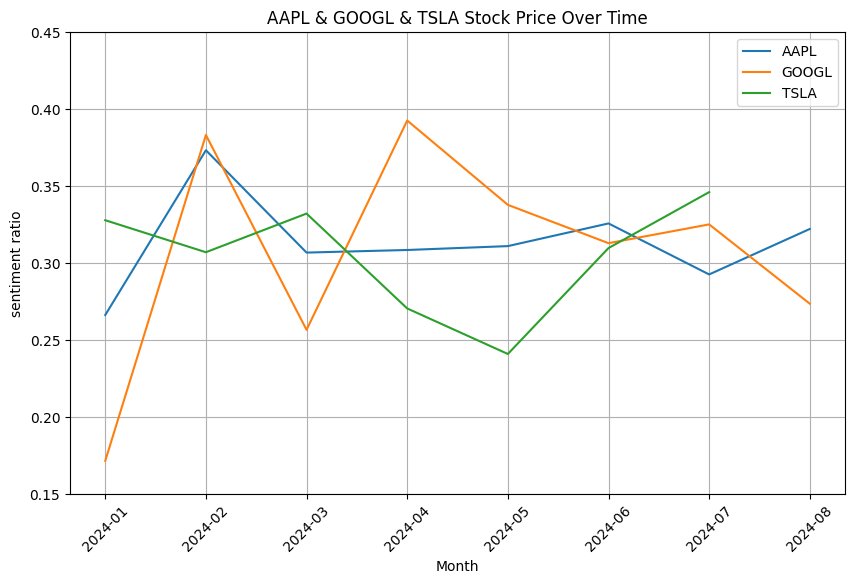

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Assuming df_month is your DataFrame

df_month_  = df_month.tail(8)
x_ = df_month_['month'].astype(str)  # Convert 'month' to string
y_ = df_month_['AAPL']
y2_ = df_month_['GOOGL']
y3_ = df_month_['TSLA']

plt.figure(figsize=(10,6))

plt.plot(x_, y_)
plt.plot(x_, y2_)
plt.plot(x_, y3_)

plt.xlabel('Month')
plt.ylabel('sentiment ratio')
plt.title('AAPL & GOOGL & TSLA Stock Price Over Time')

plt.legend(['AAPL', 'GOOGL', 'TSLA'])  # Add a legend

plt.ylim(0.15, 0.45)  # Set y-axis limits기가

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True)

plt.show()